<a href="https://colab.research.google.com/github/arteria32/MLGB/blob/master/DZ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [ ]:
X.T

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [ ]:
X.shape

(2, 10)

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

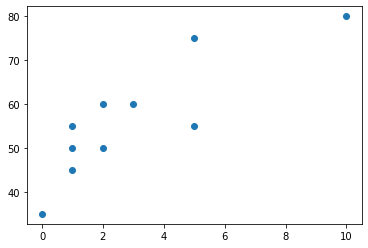

In [ ]:
plt.scatter(X[1], y)

In [ ]:
y_pred1 = n*X[0] + X[1]*m

NameError: ignored

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.legend()
plt.show()

Уравнение прямой: $y = a*x + b$

In [ ]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [ ]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

MAE (Mean Absolute Error)

In [ ]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

MSE (Mean Squared Error)

In [ ]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

Метод наименьших квадратов (МНК)

In [ ]:
X.shape

In [ ]:
X.T.shape

In [ ]:
all(X @ y == np.dot(X,y)) #X.dot(y)

In [ ]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

In [ ]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [ ]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [ ]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

In [ ]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

In [ ]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

Градиентный спуск

In [ ]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [ ]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0], W[0] - g

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [ ]:
n = X.shape[1]
alpha = 6e-2 
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(200):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.06        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 7.48 23.12], MSE = 3047.75
Iteration #10: W_new = [22.07462743 13.05784976], MSE = 865.57
Iteration #20: W_new = [30.0735307   6.78016869], MSE = 162.66
Iteration #30: W_new = [35.1835249  5.6050078], MSE = 93.96
Iteration #40: W_new = [38.3126292   5.03648529], MSE = 67.13
Iteration #50: W_new = [40.28531327  4.67876916], MSE = 55.49
Iteration #60: W_new = [41.57179614  4.44548532], MSE = 50.08
Iteration #70: W_new = [42.43695677  4.28860178], MSE = 47.41
Iteration #80: W_new = [43.03520501  4.18011869], MSE = 46.01
Iteration #90: W_new = [43.45945814  4.10318693], MSE = 45.24
Iteration #100: W_new = [43.76728298  4.04736764], MSE = 44.79
Iteration #110: W_new = [43.99531262  4.00601798], MSE = 44.53
Iteration #120: W_new = [44.1674401   3.97480531], MSE = 44.36
Iteration #130: W_new = [44.29960683  3.95083891], MSE = 44.25
Iteration #140: W_new = [44.40267405  3.93214926]

Предварительно выставив кол-во итераций, подбором определяем alpha с наименьшим MSE, далее подобрал кол-во итераций до момента изменения MSE на 1/100. Ответ сверил с примером(MSE одного порядка)

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [ ]:
n = X.shape[1]
alpha = 6e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(200):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha *np.dot(X , y_pred-y)/len(y)
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.06        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 4.24 11.81], MSE = 3047.75
Iteration #10: W_new = [14.05036364  9.43607278], MSE = 522.79
Iteration #20: W_new = [21.56325286  8.07372615], MSE = 318.89
Iteration #30: W_new = [27.25609642  7.04141675], MSE = 201.82
Iteration #40: W_new = [31.56981205  6.25919093], MSE = 134.61
Iteration #50: W_new = [34.83850237  5.66646433], MSE = 96.01
Iteration #60: W_new = [37.31533146  5.21732957], MSE = 73.85
Iteration #70: W_new = [39.1921328   4.87700058], MSE = 61.13
Iteration #80: W_new = [40.61426696  4.61911848], MSE = 53.82
Iteration #90: W_new = [41.69187999  4.42370997], MSE = 49.62
Iteration #100: W_new = [42.50843433  4.27564043], MSE = 47.22
Iteration #110: W_new = [43.12717315  4.16344169], MSE = 45.83
Iteration #120: W_new = [43.59601851  4.07842381], MSE = 45.04
Iteration #130: W_new = [43.95128307  4.01400206], MSE = 44.58
Iteration #140: W_new = [44.22048251  3.96518

In [ ]:
Изменить np.sum(составная часть умножения матриц) на np.dot(умножение матриц) и делим на len(y)-размер выборки